# Generating Random Data Files #

In [69]:
import numpy as np

#generate random 100 mb files with 0 and 1
size_100mb = 8*1000*1000*100
zeros_100p = np.random.choice([0, 1], size=size_100mb, replace=True, p=[1, 0])
zeros_100p = np.packbits(zeros_100p)
open("zeros_100p", "wb").write(zeros_100p)

zeros_90p = np.random.choice([0, 1], size=size_100mb, replace=True, p=[0.9, 0.1])
zeros_90p = np.packbits(zeros_90p)
open("zeros_90p", "wb").write(zeros_90p)

zeros_80p = np.random.choice([0, 1], size=size_100mb, replace=True, p=[0.8, 0.2])
zeros_80p = np.packbits(zeros_80p)
open("zeros_80p", "wb").write(zeros_80p)

zeros_70p = np.random.choice([0, 1], size=size_100mb, replace=True, p=[0.7, 0.3])
zeros_70p = np.packbits(zeros_70p)
open("zeros_70p", "wb").write(zeros_70p)

zeros_60p = np.random.choice([0, 1], size=size_100mb, replace=True, p=[0.6, 0.4])
zeros_60p = np.packbits(zeros_60p)
open("zeros_60p", "wb").write(zeros_60p)

zeros_50p = np.random.choice([0, 1], size=size_100mb, replace=True, p=[0.5, 0.5])
zeros_50p = np.packbits(zeros_50p)
open("zeros_50p", "wb").write(zeros_50p)

#generate random 100 million letters of DNA
letter_100m = 100000000
DNA_100m_letter = np.random.choice(["A", "T", "C", "G"], size=letter_100m, replace=True, p=[0.25, 0.25, 0.25, 0.25])
open("DNA_100m_seq.fa", "w").write("".join(DNA_100m_letter))

#generate random 100 million letters of amino acids
protein_100m_letter = np.random.choice(["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"], size=letter_100m, replace=True, p=[0.05 for x in range(20)])
open("protein_100m_seq.fa", "w").write("".join(protein_100m_letter))

100000000

### Note to grader:
#### To keep track of the size of the input files, the size of the output files, and the time each command took to run, instead of using table, we used plot because it is easier for visualization. A graph with input filesize, output filesize and runtime is plotted after each types of compression. A fifth graph (Fig. 5) contains the runtime of different compression methods.

# gzip Compression #

In [394]:
import subprocess
import os

file_name = ["zeros_50p", "zeros_60p", "zeros_70p", "zeros_80p", "zeros_90p", "zeros_100p", "DNA_100m_seq.fa", "protein_100m_seq.fa"]
data_gz = {}

for name in file_name:
    #try to delete compressed file if exists to avoid overwrite error
    try:
        os.remove(name+".gz")
    #if file doesnt exist, it cant be deleted so do nothing
    except:
        random_filler_variable = 0 
    
    #run command line compression function
    p = subprocess.run(["time", "gzip", "-k", name], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    message = p.stderr.decode()
    
    #decode compressed filesize and runtime
    file_size = os.path.getsize(name+".gz")/1000000
    runtime = message[message.find("elapsed")-5:message.find("elapsed")]
    
    #store in dictionary structure
    data_gz[name] = [runtime, file_size]
    
#print data
print(list(data_gz.keys()))
print([x[0] for x in data_gz.values()])
print([x[1] for x in data_gz.values()])

['zeros_50p', 'zeros_60p', 'zeros_70p', 'zeros_80p', 'zeros_90p', 'zeros_100p', 'DNA_100m_seq.fa', 'protein_100m_seq.fa']
['04.28', '05.17', '07.43', '16.61', '23.10', '00.75', '15.42', '05.35']
[100.016029, 97.673917, 89.282179, 77.401699, 56.017037, 0.097082, 29.223004, 60.558803]


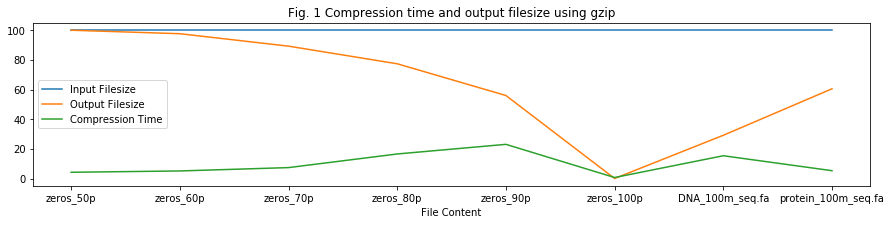

In [395]:
import matplotlib.pyplot as plt 

#Fig 1. Compression time of different size files using gzip
# Input Data 
data_content = list(data_gz.keys())
input_filesize = [100 for x in range (8)]
output_filesize = [x[1] for x in data_gz.values()]
runtime = list(map(float, [x[0] for x in data_gz.values()]))

# plotting   
plt.plot(data_content, input_filesize, label = "Input Filesize")  
plt.plot(data_content, output_filesize, label = "Output Filesize") 
plt.plot(data_content, runtime, label = "Compression Time") 
  
# add graph features 
plt.xlabel('File Content')  
plt.title('Fig. 1 Compression time and output filesize using gzip') 
plt.legend() 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show() 

# bzip2 Compression #

In [396]:
import subprocess
import os

file_name = ["zeros_50p", "zeros_60p", "zeros_70p", "zeros_80p", "zeros_90p", "zeros_100p", "DNA_100m_seq.fa", "protein_100m_seq.fa"]
data_bz2 = {}

for name in file_name:
    #try to delete compressed file if exists to avoid overwrite error
    try:
        os.remove(name+".bz2")
    #if file doesnt exist, it cant be deleted so do nothing
    except:
        random_filler_variable = 0 
    
    #run command line compression function
    p = subprocess.run(["time", "bzip2", "-k", name], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    message = p.stderr.decode()
    
    #decode compressed filesize and runtime
    file_size = os.path.getsize(name+".bz2")/1000000
    runtime = message[message.find("elapsed")-5:message.find("elapsed")]
    
    #store in dictionary structure
    data_bz2[name] = [runtime, file_size]
    
#print data
print(list(data_bz2.keys()))
print([x[0] for x in data_bz2.values()])
print([x[1] for x in data_bz2.values()])

['zeros_50p', 'zeros_60p', 'zeros_70p', 'zeros_80p', 'zeros_90p', 'zeros_100p', 'DNA_100m_seq.fa', 'protein_100m_seq.fa']
['22.47', '19.62', '17.98', '15.43', '13.70', '01.19', '12.27', '13.64']
[100.442445, 100.050082, 95.139644, 82.633246, 58.324842, 0.000113, 27.32893, 55.259899]


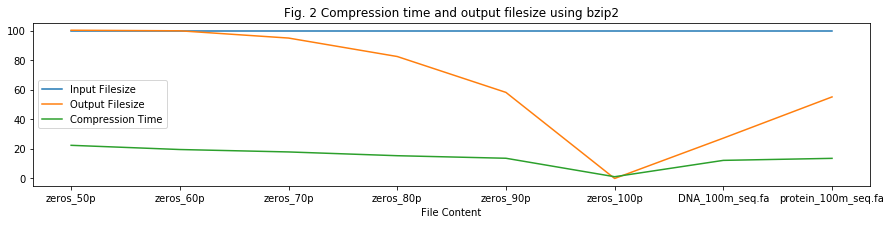

In [397]:
#Fig 2. Compression time of different size files using bzip2

# Input Data 
data_content = list(data_bz2.keys())
input_filesize = [100 for x in range (8)]
output_filesize = [x[1] for x in data_bz2.values()]
runtime = list(map(float, [x[0] for x in data_bz2.values()]))

# plotting   
plt.plot(data_content, input_filesize, label = "Input Filesize")  
plt.plot(data_content, output_filesize, label = "Output Filesize") 
plt.plot(data_content, runtime, label = "Compression Time") 
  
# add graph features 
plt.xlabel('File Content')  
plt.title('Fig. 2 Compression time and output filesize using bzip2') 
plt.legend() 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show() 

# pbzip2 Compression #

In [398]:
import subprocess
import os

file_name = ["zeros_50p", "zeros_60p", "zeros_70p", "zeros_80p", "zeros_90p", "zeros_100p", "DNA_100m_seq.fa", "protein_100m_seq.fa"]
data_pbz2 = {}

for name in file_name:
    #try to delete compressed file if exists to avoid overwrite error
    try:
        os.remove(name+".bz2")
    #if file doesnt exist, it cant be deleted so do nothing
    except:
        random_filler_variable = 0 
    
    #run command line compression function
    p = subprocess.run(["time", "pbzip2", "-k", name], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    message = p.stderr.decode()
    
    #decode compressed filesize and runtime
    file_size = os.path.getsize(name+".bz2")/1000000
    runtime = message[message.find("elapsed")-5:message.find("elapsed")]
    
    #store in dictionary structure
    data_pbz2[name] = [runtime, file_size]
    
#print data
print(list(data_pbz2.keys()))
print([x[0] for x in data_pbz2.values()])
print([x[1] for x in data_pbz2.values()])

['zeros_50p', 'zeros_60p', 'zeros_70p', 'zeros_80p', 'zeros_90p', 'zeros_100p', 'DNA_100m_seq.fa', 'protein_100m_seq.fa']
['02.20', '02.06', '01.73', '01.41', '01.16', '00.13', '01.00', '01.16']
[100.453354, 100.056831, 95.146779, 82.646481, 58.352044, 0.005375, 27.343471, 55.268701]


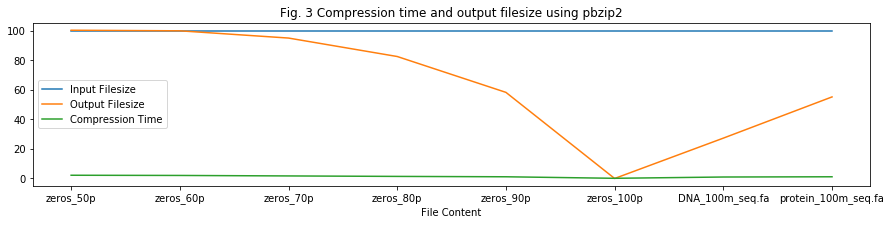

In [399]:
#Fig 3. Compression time of different size files using pbzip2
# Input Data 
data_content = list(data_pbz2.keys())
input_filesize = [100 for x in range (8)]
output_filesize = [x[1] for x in data_pbz2.values()]
runtime = list(map(float, [x[0] for x in data_pbz2.values()]))

# plotting   
plt.plot(data_content, input_filesize, label = "Input Filesize")  
plt.plot(data_content, output_filesize, label = "Output Filesize") 
plt.plot(data_content, runtime, label = "Compression Time") 
  
# add graph features 
plt.xlabel('File Content')  
plt.title('Fig. 3 Compression time and output filesize using pbzip2') 
plt.legend() 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show() 

# ArithmeticCompress Compression #

In [400]:
import subprocess
import os

file_name = ["zeros_50p", "zeros_60p", "zeros_70p", "zeros_80p", "zeros_90p", "zeros_100p", "DNA_100m_seq.fa", "protein_100m_seq.fa"]
data_art = {}

for name in file_name:
    #try to delete compressed file if exists to avoid overwrite error
    try:
        os.remove(name+".art")
    #if file doesnt exist, it cant be deleted so do nothing
    except:
        random_filler_variable = 0 
    
    #run command line compression function
    p = subprocess.run(["time", "ArithmeticCompress", name, name+".art"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    message = p.stderr.decode()
    
    #decode compressed filesize and runtime
    file_size = os.path.getsize(name+".art")/1000000
    runtime = message[message.find("elapsed")-5:message.find("elapsed")]
    
    #store in dictionary structure
    data_art[name] = [runtime, file_size]
    
#print data
print(list(data_art.keys()))
print([x[0] for x in data_art.values()])
print([x[1] for x in data_art.values()])

['zeros_50p', 'zeros_60p', 'zeros_70p', 'zeros_80p', 'zeros_90p', 'zeros_100p', 'DNA_100m_seq.fa', 'protein_100m_seq.fa']
['43.27', '44.54', '42.04', '38.89', '32.79', '15.80', '23.93', '32.25']
[100.001005, 97.0959, 88.132437, 72.194782, 46.903433, 0.001028, 25.001027, 54.025128]


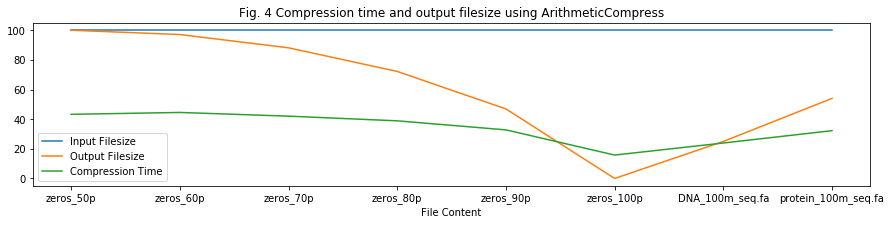

In [401]:
#Fig 4. Compression time of different size files using ArithmeticCompress
# Input Data 
data_content = list(data_art.keys())
input_filesize = [100 for x in range (8)]
output_filesize = [x[1] for x in data_art.values()]
runtime = list(map(float, [x[0] for x in data_art.values()]))

# plotting   
plt.plot(data_content, input_filesize, label = "Input Filesize")  
plt.plot(data_content, output_filesize, label = "Output Filesize") 
plt.plot(data_content, runtime, label = "Compression Time") 
  
# add graph features 
plt.xlabel('File Content')  
plt.title('Fig. 4 Compression time and output filesize using ArithmeticCompress') 
plt.legend() 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show() 

# Compare runtime for different compression methods

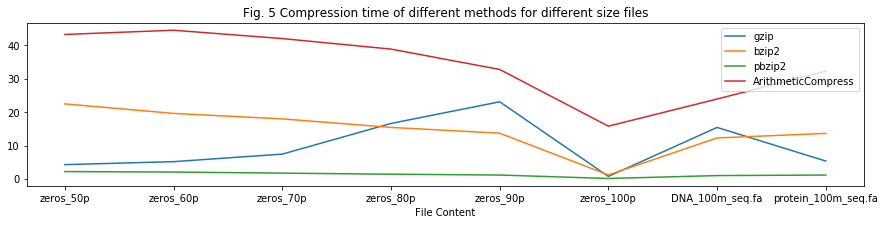

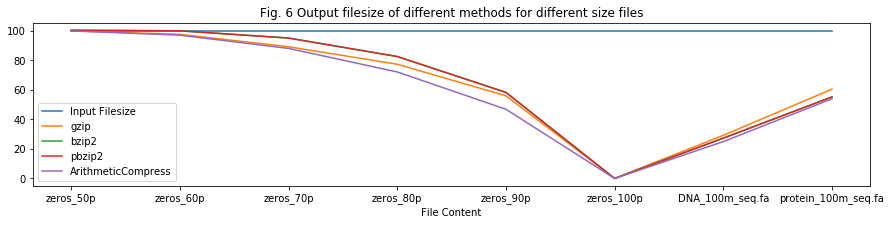

***In Fig. 6, the output filesizes by bzip2 and pbzip2 are so close that they are overlapping on the graph***


In [402]:
#Fig 5. Compression time of different methods for different size files
# Input Data 
data_content = list(data_art.keys())
runtime_gz = list(map(float, [x[0] for x in data_gz.values()]))
runtime_bz2 = list(map(float, [x[0] for x in data_bz2.values()]))
runtime_pbz2 = list(map(float, [x[0] for x in data_pbz2.values()]))
runtime_art = list(map(float, [x[0] for x in data_art.values()]))


# plotting   
plt.plot(data_content, runtime_gz, label = "gzip")  
plt.plot(data_content, runtime_bz2, label = "bzip2") 
plt.plot(data_content, runtime_pbz2, label = "pbzip2") 
plt.plot(data_content, runtime_art, label = "ArithmeticCompress") 

# add graph features 
plt.xlabel('File Content')  
plt.title('Fig. 5 Compression time of different methods for different size files') 
plt.legend() 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show() 

#Fig 6. Output filesize of different methods for different size files
# Input Data 
data_content = list(data_art.keys())
input_filesize = [100 for x in range (8)] # input filesize as baseline
output_filesize_gz = [x[1] for x in data_gz.values()]
output_filesize_bz2 = [x[1] for x in data_bz2.values()]
output_filesize_pbz2 = [x[1] for x in data_pbz2.values()]
output_filesize_art = [x[1] for x in data_art.values()]

# plotting   
plt.plot(data_content, input_filesize, label = "Input Filesize")  
plt.plot(data_content, output_filesize_gz, label = "gzip")  
plt.plot(data_content, output_filesize_bz2, label = "bzip2") 
plt.plot(data_content, output_filesize_pbz2, label = "pbzip2") 
plt.plot(data_content, output_filesize_art, label = "ArithmeticCompress") 

# add graph features 
plt.xlabel('File Content')  
plt.title('Fig. 6 Output filesize of different methods for different size files') 
plt.legend() 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show() 
print("***In Fig. 6, the output filesizes by bzip2 and pbzip2 are so close that they are overlapping on the graph***")

## Questions:
**Which algorithm achieves the best level of compression on each file type? Which algorithm is the fastest?**  
ArithmeticCompress provides highest level of compression on the random DNA, protein and binary data. pbzip2 is the fastest for the random DNA, protein and binary data.  

**What is the difference between bzip2 and pbzip2? Do you expect one to be faster and why?**   
pbzip2 is a parallel implementation of the bzip2 and it breaks down the file to small pieces to compress simultaneously, therefore faster. [reference](https://www.systutorials.com/docs/linux/man/1-pbzip2/)

**How does the level of compression change as the percentage of zeros increases? Why does this happen?**  
As the percentage of zeros increases, the level of compression improves. Because the randomness of data decreases, the entropy is lower, therefore compression becomes easier.

**What is the minimum number of bits required to store a single DNA base?**  
2 bits

**What is the minimum number of bits required to store an amino acid letter?**  
5 bits

**In your tests, how many bits did gzip and bzip2 actually require to store your random DNA and protein sequences?**  
gzip used 2.3e8 bits to store 1.0e8 bases random DNA sequence.  
gzip used 4.8e8 bits to store 1.0e8 amino acids random protein sequence.  
bzip2 used 2.1e8 bits to store 1.0e8 bases random DNA sequence.  
bzip2 used 4.4e8 bits to store 1.0e8 amino acids random protein sequence. 

**Are gzip and bzip2 performing well on DNA and proteins?**  
They perform quite well on compressing protein sequences, and moderately on compressing DNA sequences.

# Fetch HIV gp120 homologs sequences into a single multi-FASTA file

In [403]:
import io
from Bio import Entrez
Entrez.email = "zhong01@berkeley.edu"
handle = Entrez.esearch(db='nucleotide', term='Human immunodeficiency virus[ORGN] gp120', sort='relevance', idtype='acc')

# Fetch sequences of gp120 homologs from different HIV isolates,
# and concatenate them together into a single multi-FASTA file
open("HIV_seq.fasta", "w+")
f = open("HIV_seq.fasta", "a")
for i in Entrez.read(handle)['IdList'][0:10]:
    handle = Entrez.efetch(db='nucleotide', id=i, rettype='fasta', retmode='fasta')
    f.write(handle.read())

# Compress using gzip, bzip2, and arithmetic
expect to achieve better compression than random data, based on the trend observed in Fig. 6. 

In [404]:
#
name = "HIV_seq.fasta" 
data_HIV = {}

#try to delete compressed file if exists to avoid overwrite error
try:
    os.remove(name+".gz")
    os.remove(name+".bz2")
    os.remove(name+".art")

#if file doesnt exist, it cant be deleted so do nothing
except:
    random_filler_variable = 0 

#run command line compression function gzip
p = subprocess.run(["time", "gzip", "-k", name], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
message = p.stderr.decode()

#decode compressed filesize and runtime
runtime = message[message.find("elapsed")-5:message.find("elapsed")]
file_size = os.path.getsize(name+".gz")/1000

#store in dictionary structure
data_HIV["gzip"] = [float(runtime), file_size]

#run command line compression function bzip2
p = subprocess.run(["time", "bzip2", "-k", name], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
message = p.stderr.decode()

#decode compressed filesize and runtime
runtime = message[message.find("elapsed")-5:message.find("elapsed")]
file_size = os.path.getsize(name+".bz2")/1000

#store in dictionary structure
data_HIV["bzip2"] = [float(runtime), file_size]

#run command line compression function arithmetic
p = subprocess.run(["time", "ArithmeticCompress", name, name+".art"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
message = p.stderr.decode()

#decode compressed filesize and runtime
runtime = message[message.find("elapsed")-5:message.find("elapsed")]
file_size = os.path.getsize(name+".art")/1000

#store in dictionary structure
data_HIV["arithmetic"] = [float(runtime), file_size]

#print data
print(list(data_HIV.keys()))
print([x[0] for x in data_HIV.values()])
print([x[1] for x in data_HIV.values()])

['gzip', 'bzip2', 'arithmetic']
[0.0, 0.0, 0.0]
[0.833, 0.996, 3.21]


Best compression method: gzip.  
Compression ratio using gzip: 10.9 kb / 0.833 kb = 13.  
Compression ratio of this file is higher than random data.

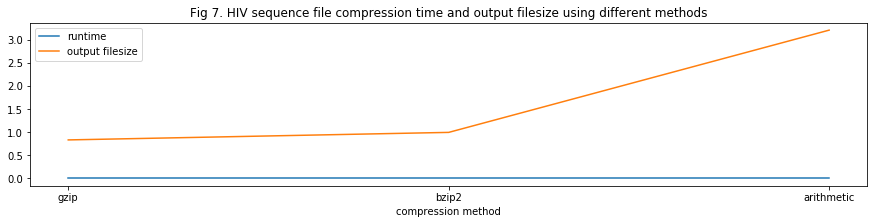

In [405]:
#Fig 7. HIV sequence file compression time and output filesize using different methods

# Input Data 
compression_method = list(data_HIV.keys())
compression_time = list([x[0] for x in data_HIV.values()])
output_filesize = list([x[1] for x in data_HIV.values()])

# plotting   
plt.plot(compression_method, compression_time, label = "runtime")  
plt.plot(compression_method, output_filesize, label = "output filesize") 

# add graph features 
plt.xlabel("compression method")  
plt.title('Fig 7. HIV sequence file compression time and output filesize using different methods') 
plt.legend() 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show() 

## Estimating compression of 1000 terabytes
re-sequencing of genomes and plasmids that are very similar to each other: gzip  
protein sequences: gzip  
binary microscope images: ArithmeticCompress  
Estimated fraction of space to save: ~12%
Estimate bonus: ~ $2,000,000